# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("~/Desktop/HW1_PR1.csv",parse_dates=['Date'])
df[:5]

,Date,Price,Price.1
0,1999-01-15,29.24,124.38
1,1999-01-19,29.24,125.19
2,1999-01-20,28.60,126.19
3,1999-01-21,30.92,122.84
4,1999-01-22,31.95,122.56


In [3]:
import datetime
from datetime import datetime, date

In [4]:
Date_col = df.pop('Date')
df[:5]

,Price,Price.1
0,29.24,124.38
1,29.24,125.19
2,28.60,126.19
3,30.92,122.84
4,31.95,122.56


In [5]:
data=df.copy()
data.index=Date_col
data[:5]

,Price,Price.1
Date,,
1999-01-15,29.24,124.38
1999-01-19,29.24,125.19
1999-01-20,28.60,126.19
1999-01-21,30.92,122.84
1999-01-22,31.95,122.56


In [6]:
df1=daily_returns = data.pct_change()
df1

,Price,Price.1
Date,,
1999-01-15,NaN,NaN
1999-01-19,0.000000,0.006512
1999-01-20,-0.021888,0.007988
1999-01-21,0.081119,-0.026547
1999-01-22,0.033312,-0.002279
...,...,...
2018-12-24,0.197941,-0.026423
2018-12-26,-0.156917,0.050525
2018-12-27,-0.014798,0.007677


In [7]:
#1. transform VIX daily price time series to daily return time series 

In [8]:
df1[:1]=0
df2=df1

In [9]:
#2. calculate the sample moments (mean,skewness, and kurtosis) 
#for the VIX daily returns

In [10]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [11]:
kurtosis(df2.Price)

19.286593192618948

In [12]:
skew(df2.Price)

2.014400835173441

In [13]:
mean_daily_VIX=df2.Price.mean()
mean_daily_VIX

0.0023566671238566543

In [14]:
len(df2.Price)

5022

In [15]:
#3. test whether the VIX daily returns were normally distributed or not. 

In [16]:
#a.Q-Q plot

In [17]:
mean=mean_daily_VIX
stdev=df2.Price.std()
norm=np.random.normal(mean,stdev,len(df1.Price))
norm.sort()

Text(0.5,1,'normal q-q plot')

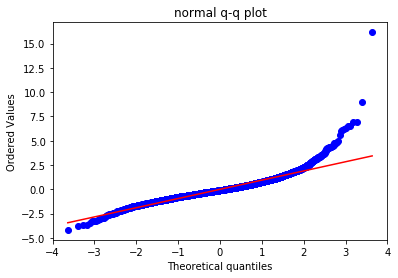

In [18]:
import pylab 
import scipy.stats as stats
x = (df2.Price-mean)/stdev
stats.probplot(x,dist="norm",plot=plt)
plt.title("normal q-q plot")

In [19]:
#From the Q-Q plot, it seems that it is not subjected
#to the normal disribution

In [20]:
#b.histogram of VIX daily return

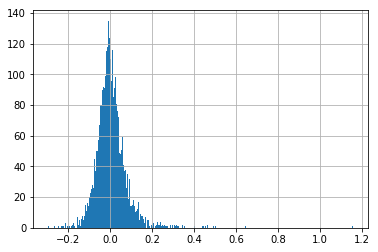

In [21]:
df2.Price.hist(bins=500)

/Users/zhangxingpu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


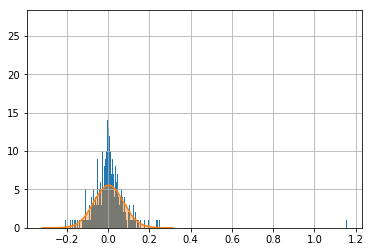

In [22]:
import seaborn as sns
df1.Price.hist(bins=5000)
x = np.random.normal(mean,stdev,50000)
sns.distplot(x);

In [23]:
#the histogram is not fited with the normal distribution of same mean and D

In [24]:
#c.Jarque-Bera test 

In [25]:
import numpy as np
from scipy import stats
np.random.seed(987654321)
stats.jarque_bera(df2.Price)

(81231.6702341713, 0.0)

In [26]:
#from the result of J-B test, we know that we need to reject
#the null hypothesis:it is subjected to normal distribution.
#So the daily return of VIX is not normally distributed.


# Problem 2

In [27]:
#1.Calculate rolling 252-day annualied SPY return volatilities, 
#and plot the time series

In [28]:
Price_SPY=df2['Price.1']
Price_SPY[:5]

Date
1999-01-15    0.000000
1999-01-19    0.006512
1999-01-20    0.007988
1999-01-21   -0.026547
1999-01-22   -0.002279
Name: Price.1, dtype: float64

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
Rol_vol=df2["Price.1"].rolling(252).std()

In [30]:
Anul_vol=Rol_vol*(np.sqrt(252))
Anul_vol[251:]

Date
2000-01-13    0.190986
2000-01-14    0.191420
2000-01-18    0.191525
2000-01-19    0.191532
2000-01-20    0.190254
                ...   
2018-12-24    0.162820
2018-12-26    0.170620
2018-12-27    0.170803
2018-12-28    0.170804
2018-12-31    0.171026
Name: Price.1, Length: 4771, dtype: float64

/Users/zhangxingpu/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


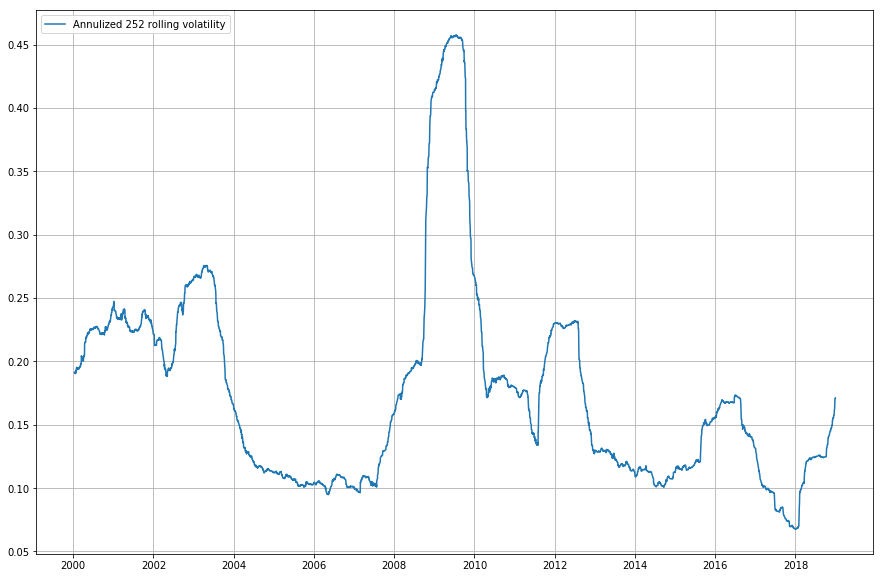

In [31]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(Anul_vol,label='Annulized 252 rolling volatility')
plt.legend(loc=2)

In [32]:
#2.Calculate rolling 252-day annualized SPY return semi-volatility (based on negative daily returns) , and plot the time series

In [33]:
Nega_Return=Price_SPY[(Price_SPY<0)]

Nega_Return[251:]

Date
2001-01-09   -0.002688
2001-01-12   -0.001890
2001-01-19   -0.005639
2001-01-25   -0.002566
2001-01-26   -0.001103
                ...   
2018-12-19   -0.014976
2018-12-20   -0.016278
2018-12-21   -0.026176
2018-12-24   -0.026423
2018-12-28   -0.001290
Name: Price.1, Length: 2070, dtype: float64

In [34]:
Rol_semi_vol=Nega_Return.rolling(252).std()

In [35]:
Anul_semi_vol=Rol_semi_vol*(np.sqrt(252))
Anul_semi_vol[251:]

Date
2001-01-09    0.131685
2001-01-12    0.130935
2001-01-19    0.130774
2001-01-25    0.130989
2001-01-26    0.131233
                ...   
2018-12-19    0.105361
2018-12-20    0.105873
2018-12-21    0.107886
2018-12-24    0.109929
2018-12-28    0.109988
Name: Price.1, Length: 2070, dtype: float64

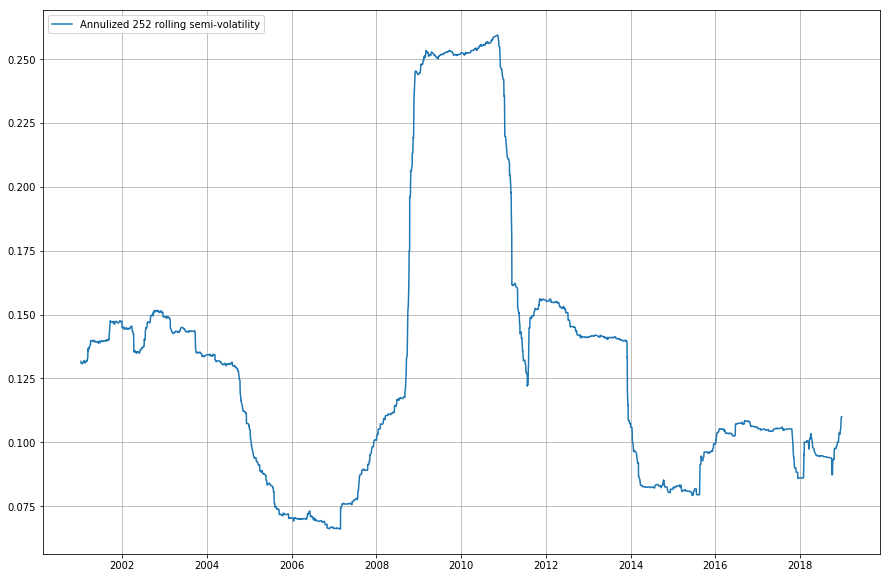

In [36]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(Anul_semi_vol,label='Annulized 252 rolling semi-volatility')
plt.legend(loc=2)

In [37]:
#3.Based on SPY daily returns in 2018
#A). calculate its shortfall probability for a daily return less than -2%;

In [38]:
data_2018=Price_SPY['2018']
data_2018

Date
2018-01-02    0.007157
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
                ...   
2018-12-24   -0.026423
2018-12-26    0.050525
2018-12-27    0.007677
2018-12-28   -0.001290
2018-12-31    0.008759
Name: Price.1, Length: 251, dtype: float64

In [39]:
a=len(data_2018)
a

251

In [40]:
b=len(data_2018[(data_2018<-0.02)])
b

14

In [41]:
SF_Prob=b/a
SF_Prob

0.055776892430278883

In [42]:
# B). Value at Risk at 95% for daily

In [43]:
from tabulate import tabulate

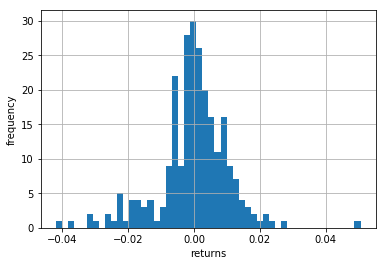

In [44]:
plt.hist(data_2018,bins=50)
df['returns']=Price_SPY
plt.xlabel('returns')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

In [45]:
#df.sort_values(df2['Price.1'],inplace=True, ascending = True)
#Var_95=df2['Price.1'].quantile(0.05)
#Var_95

In [46]:
Var_95=np.percentile(data_2018,5)
Var_95

-0.02144958473986508

In [47]:
#C). CVaR-95% for daily return.

In [48]:
Last_5=data_2018[(data_2018<Var_95)]
Last_5

Date
2018-02-02   -0.021770
2018-02-05   -0.041822
2018-02-08   -0.037509
2018-03-22   -0.024997
2018-04-02   -0.021585
2018-04-06   -0.022286
2018-10-10   -0.031663
2018-10-11   -0.022027
2018-10-24   -0.030299
2018-12-04   -0.032402
2018-12-07   -0.023236
2018-12-21   -0.026176
2018-12-24   -0.026423
Name: Price.1, dtype: float64

In [49]:
Last_5.mean()

-0.02786116034896852

In [50]:
#4. Calculate drawdowns for the SPY price times series, plot the drawdown time series, and locate the maximum drawdown for the whole period

In [51]:
Price_spy=df['Price.1']

In [52]:
from pandas_datareader import data, wb

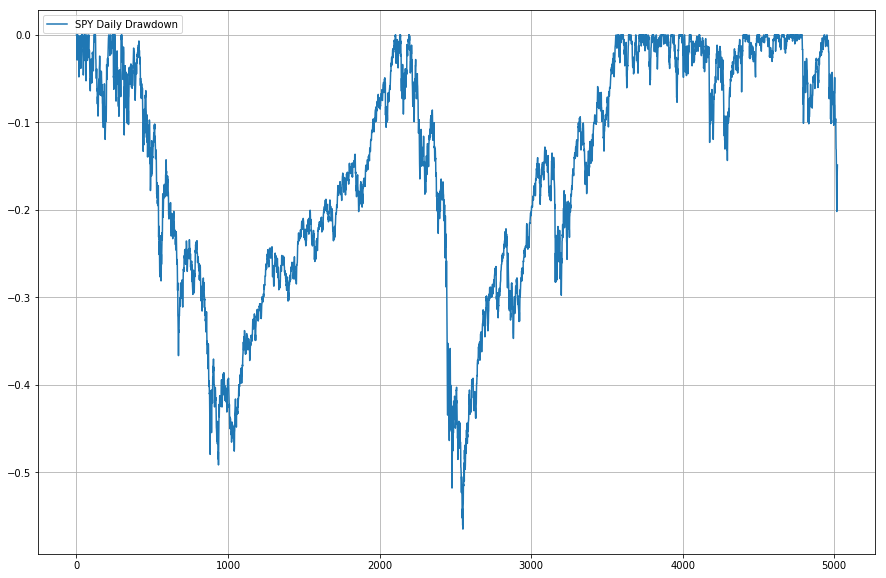

In [53]:
Roll_Max=Price_spy.cummax()
Daily_Drawdown=(Price_spy/Roll_Max)-1
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(Daily_Drawdown,label='SPY Daily Drawdown')
plt.legend(loc=2)

In [54]:
Max_Daily_Drawdown=Daily_Drawdown.cummin()
Max_Daily_Drawdown

0       0.000000
1       0.000000
2       0.000000
3      -0.026547
4      -0.028766
          ...   
5017   -0.564737
5018   -0.564737
5019   -0.564737
5020   -0.564737
5021   -0.564737
Name: Price.1, Length: 5022, dtype: float64

In [55]:
Value=Max_Daily_Drawdown.min()
Max_Daily_Drawdown[(Max_Daily_Drawdown==Value)]

2550   -0.564737
2551   -0.564737
2552   -0.564737
2553   -0.564737
2554   -0.564737
          ...   
5017   -0.564737
5018   -0.564737
5019   -0.564737
5020   -0.564737
5021   -0.564737
Name: Price.1, Length: 2472, dtype: float64

In [56]:
#The maximum drawdown appeared on 9th, March

# Problem 3

In [58]:
df3 = pd.read_csv("~/Desktop/599HW1PR3.csv",parse_dates=['Period Ending'])
df3[:5]

,Period Ending,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
0,1999-01-31,1.16,0.71,1.35,-1.57,5.87,0.80,4.50,-2.27,-0.30,-1.51,0.44,-2.69
1,1999-02-28,-0.70,-1.75,-0.68,-3.51,-4.57,-1.41,-9.15,-6.83,-2.38,0.96,-4.60,-1.64
2,1999-03-31,-0.01,0.55,1.16,0.19,5.27,2.07,3.56,-0.82,4.17,13.21,16.88,-0.55
3,1999-04-30,0.66,0.32,1.83,-0.15,0.13,9.34,8.83,9.13,4.05,12.37,4.13,9.67
4,1999-05-31,0.69,-0.88,-0.92,-2.02,-3.07,-1.10,0.16,3.07,-5.15,-0.58,-5.46,2.12


In [59]:
Date_col1 = df3.pop('Period Ending')
df3[:5]

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
0,1.16,0.71,1.35,-1.57,5.87,0.80,4.50,-2.27,-0.30,-1.51,0.44,-2.69
1,-0.70,-1.75,-0.68,-3.51,-4.57,-1.41,-9.15,-6.83,-2.38,0.96,-4.60,-1.64
2,-0.01,0.55,1.16,0.19,5.27,2.07,3.56,-0.82,4.17,13.21,16.88,-0.55
3,0.66,0.32,1.83,-0.15,0.13,9.34,8.83,9.13,4.05,12.37,4.13,9.67
4,0.69,-0.88,-0.92,-2.02,-3.07,-1.10,0.16,3.07,-5.15,-0.58,-5.46,2.12


In [60]:
data1=df3.copy()
data1.index=Date_col1
data1[:5]

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Period Ending,,,,,,,,,,,,
1999-01-31,1.16,0.71,1.35,-1.57,5.87,0.80,4.50,-2.27,-0.30,-1.51,0.44,-2.69
1999-02-28,-0.70,-1.75,-0.68,-3.51,-4.57,-1.41,-9.15,-6.83,-2.38,0.96,-4.60,-1.64
1999-03-31,-0.01,0.55,1.16,0.19,5.27,2.07,3.56,-0.82,4.17,13.21,16.88,-0.55
1999-04-30,0.66,0.32,1.83,-0.15,0.13,9.34,8.83,9.13,4.05,12.37,4.13,9.67
1999-05-31,0.69,-0.88,-0.92,-2.02,-3.07,-1.10,0.16,3.07,-5.15,-0.58,-5.46,2.12


In [61]:
data1.columns

Index(['Bloomberg Barclays - U.S. TIPS Index',
       'Bloomberg Barclays - U.S. Aggregate Index',
       'BofA Merrill Lynch - U.S. High Yield Index',
       'FTSE - Non U.S. Govt Bond Index ($)', 'Russell - 1000 Growth Index',
       'Russell - 1000 Value Index', 'Russell - 2000 Growth Index',
       'Russell - 2000 Value Index', 'MSCI - EAFE Index ($Net)',
       'MSCI - Emerging Markets Index ($ Net)', 'S&P - GSCI Total Index',
       'MSCI - U.S. REIT Index'],
      dtype='object')

In [62]:
selected=['Bloomberg Barclays - U.S. TIPS Index',
       'Bloomberg Barclays - U.S. Aggregate Index',
       'BofA Merrill Lynch - U.S. High Yield Index',
       'FTSE - Non U.S. Govt Bond Index ($)', 'Russell - 1000 Growth Index',
       'Russell - 1000 Value Index', 'Russell - 2000 Growth Index',
       'Russell - 2000 Value Index', 'MSCI - EAFE Index ($Net)',
       'MSCI - Emerging Markets Index ($ Net)', 'S&P - GSCI Total Index',
       'MSCI - U.S. REIT Index']

In [63]:
cum_returns=1+(data1/100)
Cum_Returns_P3=cum_returns.cumprod()
Cum_Returns_P3

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Period Ending,,,,,,,,,,,,
1999-01-31,1.011600,1.007100,1.013500,0.984300,1.058700,1.008000,1.045000,0.977300,0.997000,0.984900,1.004400,0.973100
1999-02-28,1.004519,0.989476,1.006608,0.949751,1.010317,0.993787,0.949382,0.910550,0.973271,0.994355,0.958198,0.957141
1999-03-31,1.004418,0.994918,1.018285,0.951556,1.063561,1.014359,0.983181,0.903084,1.013857,1.125709,1.119941,0.951877
1999-04-30,1.011048,0.998102,1.036919,0.950128,1.064944,1.109100,1.069995,0.985535,1.054918,1.264960,1.166195,1.043923
1999-05-31,1.018024,0.989318,1.027380,0.930936,1.032250,1.096900,1.071707,1.015791,1.000590,1.257623,1.102521,1.066055
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,2.799440,2.412392,3.541150,1.949224,3.170921,3.731303,4.303526,6.129435,2.264884,5.572156,1.399275,6.948998
2018-09-30,2.770046,2.396952,3.560627,1.928367,3.188679,3.738765,4.202824,5.977425,2.284588,5.542623,1.454267,6.768324
2018-10-31,2.730435,2.378016,3.503657,1.900406,2.903611,3.545097,3.671167,5.442445,2.102735,5.059861,1.369337,6.568658


In [64]:
twenty_year_return=Cum_Returns_P3.iloc[-1:,]
twenty_year_return

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Period Ending,,,,,,,,,,,,
2018-12-31,2.75863,2.436303,3.395742,1.953548,2.682031,3.300591,3.292955,4.861483,1.998152,5.12819,1.120723,6.314212


In [65]:
Anul_return3=pow(twenty_year_return,1/20)-1
Anul_return3

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Period Ending,,,,,,,,,,,,
2018-12-31,0.052046,0.04553,0.063033,0.034049,0.050566,0.061523,0.061401,0.082277,0.035217,0.085171,0.005715,0.096518


In [66]:
data2=data1/100
data2[:5]

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Period Ending,,,,,,,,,,,,
1999-01-31,0.0116,0.0071,0.0135,-0.0157,0.0587,0.0080,0.0450,-0.0227,-0.0030,-0.0151,0.0044,-0.0269
1999-02-28,-0.0070,-0.0175,-0.0068,-0.0351,-0.0457,-0.0141,-0.0915,-0.0683,-0.0238,0.0096,-0.0460,-0.0164
1999-03-31,-0.0001,0.0055,0.0116,0.0019,0.0527,0.0207,0.0356,-0.0082,0.0417,0.1321,0.1688,-0.0055
1999-04-30,0.0066,0.0032,0.0183,-0.0015,0.0013,0.0934,0.0883,0.0913,0.0405,0.1237,0.0413,0.0967
1999-05-31,0.0069,-0.0088,-0.0092,-0.0202,-0.0307,-0.0110,0.0016,0.0307,-0.0515,-0.0058,-0.0546,0.0212


In [67]:
Anul_Var3=(np.var(data2))*12
Anul_Vol3=np.sqrt(Anul_Var3)
Anul_Vol3

Bloomberg Barclays - U.S. TIPS Index          0.056531
Bloomberg Barclays - U.S. Aggregate Index     0.033741
BofA Merrill Lynch - U.S. High Yield Index    0.089163
FTSE - Non U.S. Govt Bond Index ($)           0.080772
Russell - 1000 Growth Index                   0.166167
Russell - 1000 Value Index                    0.145130
Russell - 2000 Growth Index                   0.222363
Russell - 2000 Value Index                    0.178556
MSCI - EAFE Index ($Net)                      0.162863
MSCI - Emerging Markets Index ($ Net)         0.217668
S&P - GSCI Total Index                        0.224623
MSCI - U.S. REIT Index                        0.207813
dtype: float64

In [68]:
Anul_cov=12*data2.cov()
Anul_cov

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Bloomberg Barclays - U.S. TIPS Index,0.003209,0.001494,0.001521,0.002436,0.000181,0.000310,-0.000339,0.000164,0.001128,0.002113,0.002704,0.002936
Bloomberg Barclays - U.S. Aggregate Index,0.001494,0.001143,0.000562,0.001538,-0.000503,-0.000377,-0.000915,-0.000495,0.000097,0.000215,-0.000313,0.001349
BofA Merrill Lynch - U.S. High Yield Index,0.001521,0.000562,0.007983,0.001386,0.009012,0.008088,0.012024,0.009912,0.009965,0.013449,0.006584,0.011022
FTSE - Non U.S. Govt Bond Index ($),0.002436,0.001538,0.001386,0.006551,0.000889,0.001549,0.000252,0.001000,0.004366,0.004459,0.003693,0.004142
Russell - 1000 Growth Index,0.000181,-0.000503,0.009012,0.000889,0.027727,0.018859,0.031526,0.020529,0.021914,0.026940,0.010605,0.016258
Russell - 1000 Value Index,0.000310,-0.000377,0.008088,0.001549,0.018859,0.021151,0.022104,0.021940,0.019221,0.022015,0.009526,0.019795
Russell - 2000 Growth Index,-0.000339,-0.000915,0.012024,0.000252,0.031526,0.022104,0.049652,0.033366,0.026743,0.034534,0.014962,0.023668
Russell - 2000 Value Index,0.000164,-0.000495,0.009912,0.001000,0.020529,0.021940,0.033366,0.032016,0.020911,0.024971,0.011121,0.026883
MSCI - EAFE Index ($Net),0.001128,0.000097,0.009965,0.004366,0.021914,0.019221,0.026743,0.020911,0.026635,0.030259,0.015524,0.019012
MSCI - Emerging Markets Index ($ Net),0.002113,0.000215,0.013449,0.004459,0.026940,0.022015,0.034534,0.024971,0.030259,0.047578,0.020819,0.022287


In [69]:
u=Anul_return3.T
u

Period Ending,2018-12-31
Bloomberg Barclays - U.S. TIPS Index,0.052046
Bloomberg Barclays - U.S. Aggregate Index,0.045530
BofA Merrill Lynch - U.S. High Yield Index,0.063033
FTSE - Non U.S. Govt Bond Index ($),0.034049
Russell - 1000 Growth Index,0.050566
Russell - 1000 Value Index,0.061523
Russell - 2000 Growth Index,0.061401
Russell - 2000 Value Index,0.082277
MSCI - EAFE Index ($Net),0.035217
MSCI - Emerging Markets Index ($ Net),0.085171


In [70]:
e=np.ones((12,1),dtype=int)
e

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [71]:
e.T

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [72]:
import scipy.optimize as so

In [73]:
from scipy.optimize import minimize

In [74]:
u=Anul_return3.T
u=u.iloc[:,0].to_numpy().reshape(12,1)
u

array([[0.05204587],
       [0.04553015],
       [0.06303296],
       [0.03404921],
       [0.05056564],
       [0.06152343],
       [0.06140051],
       [0.08227703],
       [0.03521706],
       [0.08517106],
       [0.00571498],
       [0.09651849]])

In [75]:
#constraint of no short-sell

In [76]:
def statistics(weights):
    weights1 = np.array(weights)
    returns = np.dot(weights1.T,u)
    variance = np.dot(weights1.T, np.dot(Anul_cov, weights1))*10000
    return np.array([returns,variance])

In [77]:
def min_func_variance(weights):
    return statistics(weights)[1]

In [ ]:
#1. Run an optimization to locate the minimum-variance portfolio on the new frontier.

In [78]:
bnds=tuple((0, 1) for x in range(12))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [79]:
cons=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [80]:
optv = so.minimize(min_func_variance,12*[1./12,],method='SLSQP', bounds=bnds, constraints=cons)

In [81]:
optv #the outcome of minimum variance portfolio

     fun: 10.263272135296456
     jac: array([28.64426076, 20.52624381, 22.78399348, 30.97836339, 20.52589333,
       20.53177488, 20.52910149, 21.64768088, 30.96957552, 39.34083974,
       20.53120196, 50.2359705 ])
 message: 'Optimization terminated successfully.'
    nfev: 147
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([5.09670958e-13, 9.26480815e-01, 0.00000000e+00, 6.01174062e-13,
       1.29258452e-02, 3.88936406e-02, 8.14245524e-03, 0.00000000e+00,
       1.70299721e-13, 4.88169817e-13, 1.35572436e-02, 1.24081165e-12])

In [82]:
x_w=optv['x'].round(3)
x_w.shape

(12,)

In [84]:
w_min_var=x_w.reshape(12,1)
w_min_var

array([[0.   ],
       [0.926],
       [0.   ],
       [0.   ],
       [0.013],
       [0.039],
       [0.008],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.014],
       [0.   ]])

In [85]:
return_min_var=np.dot(u.T,w_min_var)
return_min_var

array([[0.0457889]])

In [86]:
#2A Run optimizations to locate two other efficient portfolios different than the minimum-variance portfolio

In [87]:
# the other two portfolio on the efficient frontier

In [88]:
def min_negareturn(weights):
    return -statistics(weights)[0]
#given the variance and caculate the portfolio with the maximum return

In [89]:
bnds=tuple((0, 1) for x in range(12))

In [90]:
cons=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
      {'type': 'eq', 'fun': lambda x:  statistics(x)[1] - 11.26})

In [91]:
optv1 = so.minimize(min_negareturn,12*[1./12,],method='SLSQP', bounds=bnds, constraints=cons)

In [92]:
optv1  #the outcome of 1st portfolio

     fun: -0.0490647694747325
     jac: array([-0.05204587, -0.04553015, -0.06303296, -0.03404921, -0.05056564,
       -0.06152343, -0.06140051, -0.08227703, -0.03521706, -0.08517106,
       -0.00571498, -0.09651849])
 message: 'Optimization terminated successfully.'
    nfev: 197
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([4.25606900e-17, 8.73258661e-01, 5.83415279e-02, 0.00000000e+00,
       3.26689986e-17, 0.00000000e+00, 0.00000000e+00, 6.83998106e-02,
       7.02555384e-18, 0.00000000e+00, 2.16855224e-17, 0.00000000e+00])

In [93]:
w_optv1=optv1['x'].round(3).reshape(12,1)
w_optv1

array([[0.   ],
       [0.873],
       [0.058],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.068],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ]])

In [94]:
return_w_optv1=np.dot(u.T,w_optv1)
return_w_optv1

array([[0.04899857]])

In [95]:
bnds=tuple((0, 1) for x in range(12))

In [96]:
cons=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
      {'type': 'eq', 'fun': lambda x:  statistics(x)[1] - 15.26})

In [97]:
optv2 = so.minimize(min_negareturn,12*[1./12,],method='SLSQP', bounds=bnds, constraints=cons)

In [98]:
optv2  #the outcome of 2nd portfolio

     fun: -0.052108762446434004
     jac: array([-0.05204587, -0.04553015, -0.06303296, -0.03404921, -0.05056564,
       -0.06152343, -0.06140051, -0.08227703, -0.03521706, -0.08517106,
       -0.00571498, -0.09651849])
 message: 'Optimization terminated successfully.'
    nfev: 281
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([8.48090321e-02, 6.95590059e-01, 1.11907443e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.64766978e-18, 9.99746084e-02,
       5.08135065e-18, 8.00107322e-18, 0.00000000e+00, 7.71885677e-03])

In [99]:
w_optv2=optv2['x'].round(3).reshape(12,1)
w_optv2

array([[0.085],
       [0.696],
       [0.112],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.1  ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.008]])

In [100]:
return_w_optv2=np.dot(u.T,w_optv2)
return_w_optv2

array([[0.05217242]])

In [101]:
#2AProve or disprove the minimum-variance portfolio can be represented as a combination of the two portfolios found on 2A.

In [103]:
c=(w_min_var-w_optv2)/(w_optv1-w_optv2)
c

/Users/zhangxingpu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/zhangxingpu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[1.        ],
       [1.29943503],
       [2.07407407],
       [       nan],
       [       inf],
       [       inf],
       [       inf],
       [3.125     ],
       [       nan],
       [       nan],
       [       inf],
       [1.        ]])

In [104]:
#1.29,2.07,3.125>1 means we need to use short,
#while the assumption is that we cannot use short-sell, thus DISPROVED.

In [105]:
#3Plot both the old efficient frontier without 
#the short-sell constraint and the new efficient frontier with the short-sell constraint on the same graph.

In [106]:
#3

In [107]:
import numpy as np, numpy.random
np.random.dirichlet(np.ones(2),size=1)

array([[0.23744804, 0.76255196]])

In [108]:
num_port=2
num_combination=5000

In [110]:
a=list(np.arange(target_variance,25,0.1))
a    #conduct different variance

[10.26,
 10.36,
 10.459999999999999,
 10.559999999999999,
 10.659999999999998,
 10.759999999999998,
 10.859999999999998,
 10.959999999999997,
 11.059999999999997,
 11.159999999999997,
 11.259999999999996,
 11.359999999999996,
 11.459999999999996,
 11.559999999999995,
 11.659999999999995,
 11.759999999999994,
 11.859999999999994,
 11.959999999999994,
 12.059999999999993,
 12.159999999999993,
 12.259999999999993,
 12.359999999999992,
 12.459999999999992,
 12.559999999999992,
 12.659999999999991,
 12.759999999999991,
 12.85999999999999,
 12.95999999999999,
 13.05999999999999,
 13.15999999999999,
 13.25999999999999,
 13.359999999999989,
 13.459999999999988,
 13.559999999999988,
 13.659999999999988,
 13.759999999999987,
 13.859999999999987,
 13.959999999999987,
 14.059999999999986,
 14.159999999999986,
 14.259999999999986,
 14.359999999999985,
 14.459999999999985,
 14.559999999999985,
 14.659999999999984,
 14.759999999999984,
 14.859999999999983,
 14.959999999999983,
 15.059999999999983,
 1

In [111]:
# the new efficient frontier(without short)

In [112]:
target_min_negareturn=[]

In [113]:
bnds=tuple((0, 1) for x in range(12))#no-short x>0 and with sum up to 1
for i in a:
    cons=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},{'type': 'eq', 'fun': lambda x:  statistics(x)[1] - i})
    optvx = so.minimize(min_negareturn,12*[1./12,],method='SLSQP', bounds=bnds, constraints=cons)
    target_min_negareturn.append(optvx['fun'])    
    # given the variance and caculate the maximum return

In [114]:
target_min_posreturn=[i*(-100) for i in target_min_negareturn]

In [115]:
target_min_posreturn

[4.580648095893588,
 4.67760496629863,
 4.726778994224863,
 4.764520776501316,
 4.794255316728251,
 4.818989356187981,
 4.840238851303948,
 4.859159069347643,
 4.8763806558012135,
 4.892147458756683,
 4.906476947474675,
 4.919691046240997,
 4.932015789137455,
 4.9436095836182945,
 4.954588916115248,
 4.965042239320979,
 4.975038608815268,
 4.9846331535459845,
 4.9938707984656805,
 5.002788619863803,
 5.011417605426976,
 5.019784252972613,
 5.027911086387536,
 5.035817614800998,
 5.043520827670429,
 5.051036333725896,
 5.058412838437243,
 5.065677709584672,
 5.07283584955579,
 5.079891846938299,
 5.086849888284788,
 5.093713927308977,
 5.100487786829265,
 5.107174874164958,
 5.113778445411911,
 5.12030156281788,
 5.126747037452113,
 5.133117648984602,
 5.139419242041251,
 5.145661786619122,
 5.15184741197154,
 5.157977553890306,
 5.164053624257326,
 5.1700770618643155,
 5.176049600846404,
 5.181972090831874,
 5.187845761523925,
 5.193671944443503,
 5.199451659895874,
 5.205186075529284,

In [116]:
b=[np.sqrt(i) for i in a]

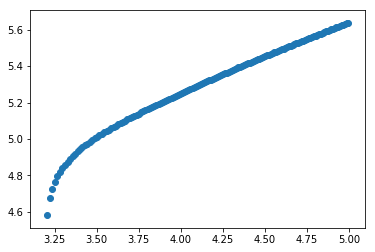

In [117]:
import matplotlib.pyplot as plt
plt.scatter(b,target_min_posreturn)

In [118]:
# the old efficient frontier(with short)

In [119]:
c=list(np.arange(2.9**2,25,0.1))

In [120]:
target_min_negareturn1=[]          
#with short, x can be any number but with sum up to 1
for i in c:
    cons=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},{'type': 'eq', 'fun': lambda x:  statistics(x)[1] - i})
    optvx = so.minimize(min_negareturn,12*[1./12,],method='SLSQP', constraints=cons)
    target_min_negareturn1.append(optvx['fun'])

In [121]:
target_min_posreturn1=[i*(-100) for i in target_min_negareturn1]

In [122]:
d=[np.sqrt(i) for i in c]

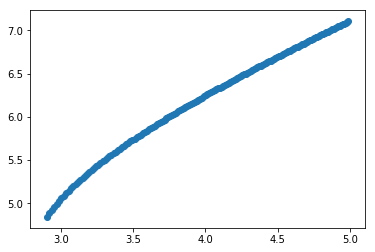

In [123]:
import matplotlib.pyplot as plt
plt.scatter(d,target_min_posreturn1)

<function matplotlib.pyplot.show(*args, **kw)>

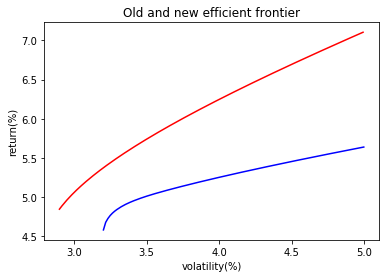

In [124]:
plt.plot(b,target_min_posreturn,'b') #plot the new frontier(without short)
plt.plot(d,target_min_posreturn1,'r')  #plot the old frontier(with short)
plt.xlabel('volatility(%)')
plt.ylabel('return(%)')
plt.title('Old and new efficient frontier')
plt.show